<a href="https://colab.research.google.com/github/brandonamendoza10/periodify_pdb/blob/main/Bigger_Ice_simulation_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openmm

In [ ]:
import tensorflow as tf
print("GPU Available:", tf.test.is_gpu_available())
print("GPU Device Name:", tf.test.gpu_device_name())



GPU Available: True
GPU Device Name: /device:GPU:0


In [ ]:
try:
    import google.colab
    !pip install condacolab
    import condacolab
    condacolab.install()
except ModuleNotFoundError:
    pass


✨🍰✨ Everything looks OK!


In [ ]:
try:
    import condacolab
    from google.colab import files
    from IPython.display import clear_output
    condacolab.check()
    !conda install -q -y -c conda-forge openmm cudatoolkit py3Dmol
except ModuleNotFoundError:
    on_colab = False
else:
    #check if installation was succesful
    try:
        import openmm
        on_colab = True
        clear_output()  # clear the excessive installation outputs
        print("Dependencies successfully installed!")
    except ModuleNotFoundError:
        print("Error while installing dependencies!")

Dependencies successfully installed!


In [ ]:
import openmm as mm
import openmm.app as app
from openmm import unit

In [ ]:
# add 2ish angstroms on all sides of the measured box size

In [ ]:
from openmm.app import *
from openmm import *
from openmm.unit import *
from sys import stdout
#used to be input.pdb
pdb = PDBFile('full_ice.pdb')
forcefield = ForceField('amber14-all.xml', 'amber14/tip3pfb.xml')
system = forcefield.createSystem(pdb.topology, nonbondedMethod=NoCutoff, nonbondedCutoff=1*nanometer, constraints=HBonds)

pad = 5
box_size = [43 + pad, 45 + pad, 53 + pad]  # Dimensions of the periodic box (in angstroms)

# Convert the box_size to Quantity with nanometer unit
box_size_quantity = [size / 10 for size in box_size]

# Create Vec3 objects for the box vectors
box_vectors = (
    openmm.Vec3(box_size_quantity[0], 0, 0),
    openmm.Vec3(0, box_size_quantity[1], 0),
    openmm.Vec3(0, 0, box_size_quantity[2])
)

pdb.topology.setPeriodicBoxVectors(box_vectors)

# Save the modified PDB file with the periodic box information
app.PDBFile.writeFile(pdb.topology, pdb.positions, open('periodic_ice.pdb', 'w'))

  # Set the periodic box vectors using the box_vectors
system.setDefaultPeriodicBoxVectors(*box_vectors)


In [ ]:
from openmm.app import PDBFile

# Load the PDB file and create the topology
pdb = PDBFile('smaller_tip42005_ice.pdb')
topology = pdb.topology

# Check if the topology has periodic box information
if topology.getUnitCellDimensions() is not None:
    print("The topology has periodic box information.")
    box_vectors = topology.getPeriodicBoxVectors()
    print("Box Vectors:", box_vectors)
else:
    print("The topology does not have periodic box information.")

The topology does not have periodic box information.


In [ ]:
from openmm.app import PDBFile

# Load the PDB file and create the topology
pdb = PDBFile('periodic_ice.pdb')
topology = pdb.topology

# Check if the topology has periodic box information
if topology.getUnitCellDimensions() is not None:
    print("The topology has periodic box information.")
    box_vectors = topology.getPeriodicBoxVectors()
    print("Box Vectors:", box_vectors)
else:
    print("The topology does not have periodic box information.")

The topology has periodic box information.
Box Vectors: (Vec3(x=4.800000000000001, y=0.0, z=0.0), Vec3(x=0.0, y=5.0, z=0.0), Vec3(x=0.0, y=0.0, z=5.800000000000001)) nm


In [ ]:
from openmm.app import *
from openmm import *
from openmm.unit import *
from sys import stdout

In [ ]:
# choose aspect ratio for box sizes and then loop through proportionality constant to minimize energy

In [ ]:
from openmm.app import *
from openmm import *
from openmm.unit import *
from sys import stdout
#used to be input.pdb
pdb = PDBFile('periodic_ice.pdb')
forcefield = ForceField('amber14-all.xml', 'amber14/tip3pfb.xml')
system = forcefield.createSystem(pdb.topology, nonbondedMethod=NoCutoff, nonbondedCutoff=1*nanometer, constraints=HBonds)

# Check if the system has periodic boundary conditions
if system.usesPeriodicBoundaryConditions():
    # Get the periodic box vectors from the PDB file
    box_vectors = pdb.topology.getPeriodicBoxVectors()

    # Set the periodic box vectors in the system
    system.setDefaultPeriodicBoxVectors(box_vectors[0], box_vectors[1], box_vectors[2])

    # Add a barostat (optional)
    barostat = app.MonteCarloBarostat(1*app.bar, 200*kelvin, 25)
    system.addForce(barostat)

#temperature used to be 300 kelvin, but we need to make sure that the ice is at a temp below freezing
integrator = LangevinMiddleIntegrator(200*kelvin, 1/picosecond, 0.002*picoseconds)
simulation = Simulation(pdb.topology, system, integrator, platform=Platform.getPlatformByName('CUDA'))
simulation.context.setPositions(pdb.positions)
simulation.minimizeEnergy()
#Used to be PDBReporter and 'output_ice.pdb'
# simulation.reporters.append(DCDReporter('output_ice2.dcd', 1000))
# simulation.reporters.append(StateDataReporter(stdout, 1000, step=True, potentialEnergy=True, temperature=True))
# simulation.step(10000)

In [ ]:
from openmm.app import *
from openmm import *
from openmm.unit import *
from sys import stdout
#used to be input.pdb
pdb = PDBFile('periodic_ice.pdb')
forcefield = ForceField('amber14-all.xml', 'amber14/tip3pfb.xml')
system = forcefield.createSystem(pdb.topology, nonbondedMethod=PME, nonbondedCutoff=1*nanometer, constraints=HBonds)

# Check if the system has periodic boundary conditions
if system.usesPeriodicBoundaryConditions():
    # Get the periodic box vectors from the PDB file
    box_vectors = pdb.topology.getPeriodicBoxVectors()

    # Set the periodic box vectors in the system
    system.setDefaultPeriodicBoxVectors(box_vectors[0], box_vectors[1], box_vectors[2])

    # Add a barostat (optional)
    barostat = MonteCarloBarostat(1*bar, 200* kelvin, 25)
    system.addForce(barostat)


#temperature used to be 300 kelvin, but we need to make sure that the ice is at a temp below freezing
integrator = LangevinMiddleIntegrator(200*kelvin, 1/picosecond, 0.002*picoseconds)
simulation = Simulation(pdb.topology, system, integrator, platform=Platform.getPlatformByName('CUDA'))
simulation.context.setPositions(pdb.positions)
simulation.minimizeEnergy()


#Used to be PDBReporter and 'output_ice.pdb'
simulation.reporters.append(DCDReporter('output_periodicice.dcd', 1000))
simulation.reporters.append(StateDataReporter(stdout, 10000, step=True, potentialEnergy=True, temperature=True))
simulation.step(5000000)

#"Step","Potential Energy (kJ/mole)","Temperature (K)"
10000,-198589.17960842897,199.9130252186261
20000,-198766.27820542955,201.59388433941697
30000,-198457.03335645865,198.48833855877643
40000,-198812.62812350004,196.87486534249845
50000,-198753.28324176592,201.60208330917453
60000,-198732.39217344997,202.86483853955207
70000,-198804.24443248904,200.84435600534633
80000,-198734.99416336522,204.88357872169513
90000,-198998.1472261881,199.3855919763656
100000,-198854.85011226102,199.20656479602098
110000,-199054.61613141664,200.49150521959652
120000,-198489.70810528367,200.777582640478
130000,-198753.61748453276,198.1922960764604
140000,-198931.84228701587,201.67073745566117
150000,-198970.4833783278,201.2476559798876
160000,-198885.716347054,199.58072911874217
170000,-198719.2374542018,202.24776343854754
180000,-198755.61083608493,200.51604182911748
190000,-198975.09584393573,197.05298453002018
200000,-199171.42795003986,196.7620513205678
210000,-199117.9983914675,203.4868382221646
22

In [ ]:
integration_step_size_ps = 0.002

# Number of steps in the simulation
number_of_steps = 1000000

# Calculate the total simulation time in picoseconds
total_simulation_time_ps = integration_step_size_ps * number_of_steps

# Convert the total simulation time to nanoseconds
total_simulation_time_ns = total_simulation_time_ps / 1000.0
print("Total simulation time:", total_simulation_time_ns, "nanoseconds")

Total simulation time: 2.0 nanoseconds


In [ ]:
!pip install MDAnalysis
!pip install matplotlib
!pip install numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
u = mda.Universe('periodic_ice.pdb','output_periodicice.dcd')
#helps me extract lots of data that I want from my simulation

/usr/local/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [ ]:
print (u)
print(len(u.trajectory))

<Universe with 10368 atoms>
1000


In [ ]:
from MDAnalysis.analysis.hydrogenbonds import HydrogenBondAnalysis

In [ ]:
hba = HydrogenBondAnalysis(
    universe=u,
    donors_sel=None,
    hydrogens_sel="name H1 H2",
    acceptors_sel="name O",
    d_a_cutoff=3.0,
    d_h_a_angle_cutoff=150,
    update_selections=False
)
u.atoms.guess_bonds()

In [ ]:
hba.run(start=None,
    stop=None,
    step=None,
    verbose=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

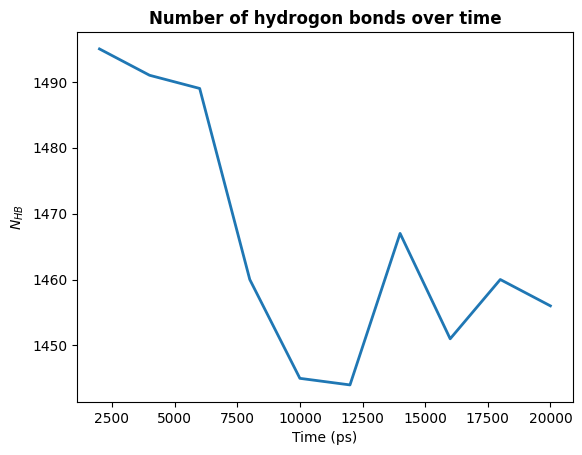

In [ ]:
plt.plot(hba.times, hba.count_by_time(), lw=2)

plt.title("Number of hydrogon bonds over time", weight="bold")
plt.xlabel("Time (ps)")
plt.ylabel(r"$N_{HB}$")

plt.show()

In [ ]:
# all = u.select_atoms('id 0:100')

# for ts in u.trajectory:
#     all.unwrap()

In [ ]:
from tqdm import tqdm
from scipy.signal import coherence

positions = []

for t in u.trajectory:
    positions.append(u.select_atoms('all').positions)

positions = np.array(positions)
ps = np.linalg.norm(positions, axis=2)
ps = ps - ps.mean(0)
# loops through all the atoms
n_atoms = 500 # u.atoms.n_atoms
cxy = np.zeros((n_atoms, n_atoms, 129))

for i in tqdm(range(n_atoms)):
    for j in range(i + 1, n_atoms):
        # , c = coherence(ps[i], sf[j], nfft=256, nperseg=64)
        f, c = coherence(ps[:, i], ps[:, j], nfft=256, nperseg=64)
        cxy[i, j, :] = c


100%|██████████| 500/500 [03:35<00:00,  2.32it/s]


In [ ]:
from MDAnalysis.analysis.distances import self_distance_array
from scipy.spatial.distance import squareform

d = squareform(self_distance_array(u.trajectory[0].positions))


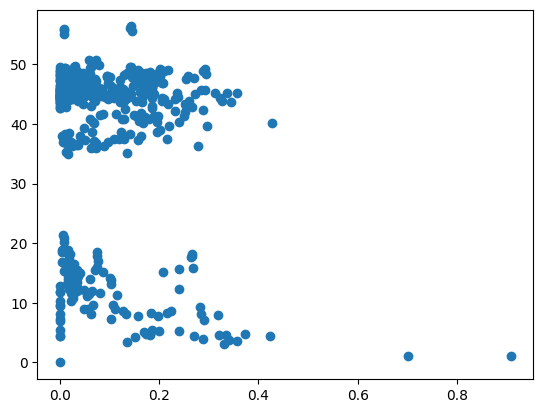

In [ ]:
i = 60
plt.scatter(cxy[i, :n_atoms, 0:4].mean(1), d[i, :n_atoms])

In [ ]:
for i in tqdm(range(n_atoms)):
    for j in range(i + 1, n_atoms):
      plt.scatter(cxy[i, j, 0:5].mean(), d[i, j])

  1%|          | 5/500 [00:13<22:30,  2.73s/it]


KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7e858e4cd1b0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7e858e4cc430> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
u.select_atoms('id 0:10').names

array(['O', 'H1', 'H2', 'O', 'H1', 'H2', 'O', 'H1', 'H2', 'O'],
      dtype=object)

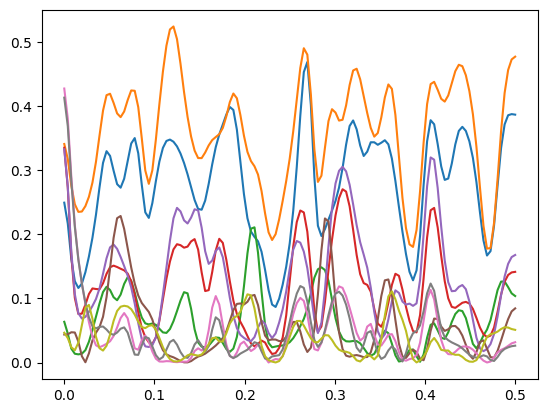

In [ ]:
h2o_1 = u.select_atoms('resid 745')
h2o_2 = u.select_atoms('resid 1759')

for i in h2o_1.ids:
    for j in h2o_2.ids:
        # , c = coherence(ps[i], sf[j], nfft=256, nperseg=64)
        f, c = coherence(ps[:, i], ps[:, j], nfft=256, nperseg=64)
        plt.plot(f, c)

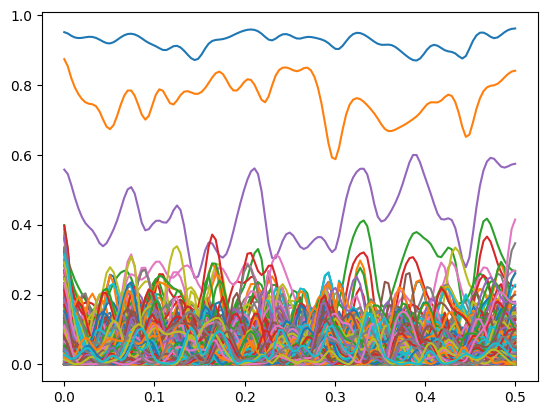

In [ ]:
plt.plot(f, cxy[9, :].T);

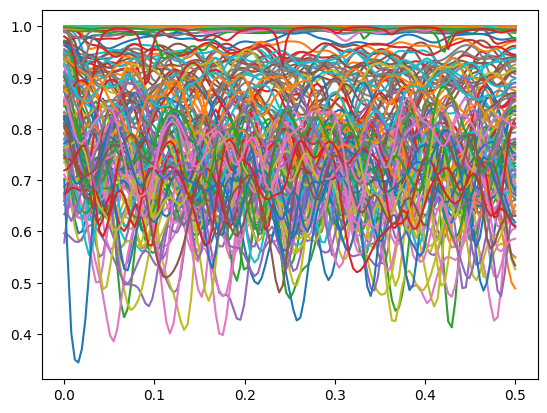

In [ ]:
for i in range(0, n_atoms, 3):
  plt.plot(f, cxy[i, i+1].T);
  # plt.plot(f, cxy[i, i+2].T);



In [ ]:
ps.shape

(1000, 10368)

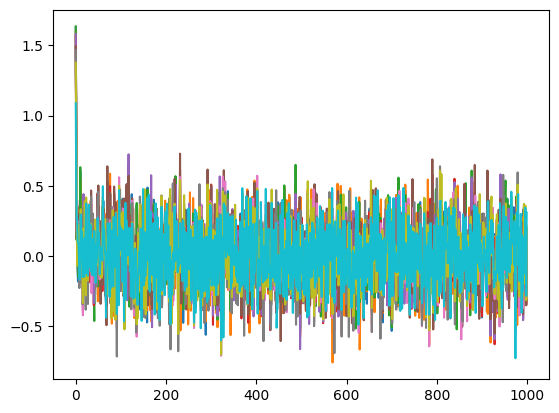

In [ ]:
plt.plot(ps[:, 0:10]);